<a href="https://colab.research.google.com/github/shriyageetika/TRISO/blob/main/TRISO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
uploaded = files.upload()

Saving openmc_nek_out.e to openmc_nek_out.e


In [5]:
! ls

drive  openmc_nek_out.e  sample_data


In [6]:
!pip install netcdf4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.7 MB/s eta 0:00:00


In [10]:
import netCDF4 as nc

# Open the Exodus file
exodus_file = 'openmc_nek_out.e'
ds = nc.Dataset(exodus_file, 'r')
for var_name, var in ds.variables.items():
       print(f"Variable: {var_name}")
       print(f"  Dimensions: {var.dimensions}")
       print(f"  Shape: {var.shape}")
       print(f"  Data Type: {var.dtype}")
       print(f"  Attributes: {var.ncattrs()}")  # Print attribute names
       print("-" * 20)

Variable: time_whole
  Dimensions: ('time_step',)
  Shape: (13,)
  Data Type: float64
  Attributes: []
--------------------
Variable: eb_status
  Dimensions: ('num_el_blk',)
  Shape: (4,)
  Data Type: int32
  Attributes: []
--------------------
Variable: eb_prop1
  Dimensions: ('num_el_blk',)
  Shape: (4,)
  Data Type: int32
  Attributes: ['name']
--------------------
Variable: ns_status
  Dimensions: ('num_node_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: []
--------------------
Variable: ns_prop1
  Dimensions: ('num_node_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: ['name']
--------------------
Variable: ss_status
  Dimensions: ('num_side_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: []
--------------------
Variable: ss_prop1
  Dimensions: ('num_side_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: ['name']
--------------------
Variable: coordx
  Dimensions: ('num_nodes',)
  Shape: (59415,)
  Data Type: float64
  Attributes: []
--------------------


In [15]:
ds = nc.Dataset('openmc_nek_out.e', 'r')

In [27]:
import netCDF4 as nc
import pandas as pd
import numpy as np

# Open the Exodus file
exodus_file = 'openmc_nek_out.e'
ds = nc.Dataset(exodus_file, 'r')

# Get all variable names
all_variables = list(ds.variables.keys())

# Create an empty dictionary to store the data
data_dict = {}

# Loop through all variables and extract data
for variable_name in all_variables:
    # Check if the variable is 1-dimensional
    if ds.variables[variable_name].ndim == 1:
        # Pad or truncate to a common length if necessary
        common_length = 1000  # Example common length
        data = ds.variables[variable_name][:]
        if len(data) < common_length:
            data = np.pad(data, (0, common_length - len(data)), 'constant')  # Pad with zeros
        elif len(data) > common_length:
            data = data[:common_length]  # Truncate
        data_dict[variable_name] = data

In [32]:
import netCDF4 as nc
import pandas as pd
import numpy as np

# Open the Exodus file
exodus_file = 'openmc_nek_out.e'
ds = nc.Dataset(exodus_file, 'r')

# Get all variable names
all_variables = list(ds.variables.keys())

# Create an empty dictionary to store the data
data_dict = {}

# Loop through all variables and extract data
for variable_name in all_variables:
    # Check if the variable is 1-dimensional
    if ds.variables[variable_name].ndim == 1:
        # Pad or truncate to a common length if necessary
        common_length = 1000  # Example common length
        data = ds.variables[variable_name][:]
        if len(data) < common_length:
            data = np.pad(data, (0, common_length - len(data)), 'constant')  # Pad with zeros
        elif len(data) > common_length:
            data = data[:common_length]  # Truncate
        data_dict[variable_name] = data

# Create a Pandas DataFrame from the data_dict
df = pd.DataFrame(data_dict) # This line is added to create the DataFrame 'df'


# Display the first few rows of the DataFrame
print(df.head())

# Get information about the DataFrame (columns, data types, etc.)
print(df.info())

# Generate descriptive statistics for the numerical columns
print(df.describe())

   time_whole  eb_status  eb_prop1  ns_status  ns_prop1  ss_status  ss_prop1  \
0    0.000000          1         2          1         1          1         1   
1    0.001184          1         3          1         3          1         3   
2    0.002368          1       101          1       101          1       101   
3    0.003551          1      1002          1     10000          1     10000   
4    0.004735          0         0          1     10001          1     10001   

     coordx    coordy  coordz  ...  elem_ss8  side_ss8  node_ns1  node_ns2  \
0 -0.008637 -0.015841   0.000  ...     18193         1        27        39   
1 -0.008001 -0.016281   0.000  ...     18194         1        28        40   
2 -0.007365 -0.015841   0.000  ...     18195         1        29        41   
3 -0.007874 -0.015400   0.000  ...     18196         1        30        42   
4 -0.008637 -0.015841   0.032  ...     18197         1        31        43   

   node_ns3  node_ns4  node_ns5  node_ns6  node_ns

In [36]:
# Display the first few rows of the DataFrame
print(df.head())
print(df.tail)

   # Get information about the DataFrame (columns, data types, etc.)
print(df.info())

   # Generate descriptive statistics for the numerical columns
print(df.describe())


   time_whole  eb_status  eb_prop1  ns_status  ns_prop1  ss_status  ss_prop1  \
0    0.000000          1         2          1         1          1         1   
1    0.001184          1         3          1         3          1         3   
2    0.002368          1       101          1       101          1       101   
3    0.003551          1      1002          1     10000          1     10000   
4    0.004735          0         0          1     10001          1     10001   

     coordx    coordy  coordz  ...  elem_ss8  side_ss8  node_ns1  node_ns2  \
0 -0.008637 -0.015841   0.000  ...     18193         1        27        39   
1 -0.008001 -0.016281   0.000  ...     18194         1        28        40   
2 -0.007365 -0.015841   0.000  ...     18195         1        29        41   
3 -0.007874 -0.015400   0.000  ...     18196         1        30        42   
4 -0.008637 -0.015841   0.032  ...     18197         1        31        43   

   node_ns3  node_ns4  node_ns5  node_ns6  node_ns

In [34]:
df.columns

Index(['time_whole', 'eb_status', 'eb_prop1', 'ns_status', 'ns_prop1',
       'ss_status', 'ss_prop1', 'coordx', 'coordy', 'coordz', 'node_num_map',
       'elem_num_map', 'elem_ss1', 'side_ss1', 'elem_ss2', 'side_ss2',
       'elem_ss3', 'side_ss3', 'elem_ss4', 'side_ss4', 'elem_ss5', 'side_ss5',
       'elem_ss6', 'side_ss6', 'elem_ss7', 'side_ss7', 'elem_ss8', 'side_ss8',
       'node_ns1', 'node_ns2', 'node_ns3', 'node_ns4', 'node_ns5', 'node_ns6',
       'node_ns7', 'node_ns8'],
      dtype='object')

In [39]:
df.head(n=20)

,time_whole,eb_status,eb_prop1,ns_status,ns_prop1,ss_status,ss_prop1,coordx,coordy,coordz,...,elem_ss8,side_ss8,node_ns1,node_ns2,node_ns3,node_ns4,node_ns5,node_ns6,node_ns7,node_ns8
0,0.000000,1,2,1,1,1,1,-0.008637,-0.015841,0.000,...,18193,1,27,39,931,2,2,1,58251,931
1,0.001184,1,3,1,3,1,3,-0.008001,-0.016281,0.000,...,18194,1,28,40,932,6,6,2,58252,932
2,0.002368,1,101,1,101,1,101,-0.007365,-0.015841,0.000,...,18195,1,29,41,933,13,13,3,58253,933
3,0.003551,1,1002,1,10000,1,10000,-0.007874,-0.015400,0.000,...,18196,1,30,42,934,15,15,4,58254,934
4,0.004735,0,0,1,10001,1,10001,-0.008637,-0.015841,0.032,...,18197,1,31,43,935,23,23,9,58255,935
5,0.005919,0,0,1,10002,1,10002,-0.008001,-0.016281,0.032,...,18198,1,32,44,936,25,25,10,58256,936
6,0.007103,0,0,1,10003,1,10003,-0.007365,-0.015841,0.032,...,18199,1,33,45,937,35,35,13,58257,937
7,0.008286,0,0,1,10004,1,10004,-0.007874,-0.015400,0.032,...,18200,1,34,46,938,36,36,14,58258,938
8,0.009470,0,0,0,0,0,0,-0.006729,-0.015400,0.000,...,18217,1,36,47,939,37,37,17,58259,939
9,0.010654,0,0,0,0,0,0,-0.007111,-0.014960,0.000,...,18218,1,38,48,940,38,38,18,58260,940


In [40]:
df.tail(n=20)

,time_whole,eb_status,eb_prop1,ns_status,ns_prop1,ss_status,ss_prop1,coordx,coordy,coordz,...,elem_ss8,side_ss8,node_ns1,node_ns2,node_ns3,node_ns4,node_ns5,node_ns6,node_ns7,node_ns8
980,0.0,0,0,0,0,0,0,-8.717337e-03,0.003775,0.000,...,28805,1,11319,11327,23876,9465,9465,1961,59231,23876
981,0.0,0,0,0,0,0,0,-8.717337e-03,0.003775,0.032,...,28806,1,11320,11328,23877,9469,9469,1962,59232,23877
982,0.0,0,0,0,0,0,0,-8.579436e-03,0.004953,0.000,...,28807,1,11363,11367,23878,9474,9474,1963,59233,23878
983,0.0,0,0,0,0,0,0,-8.579436e-03,0.004953,0.032,...,28808,1,11364,11368,23879,9479,9479,1967,59234,23879
984,0.0,0,0,0,0,0,0,-5.508022e-04,-0.000954,0.000,...,28825,1,11365,11369,23880,9485,9485,1969,59235,23880
985,0.0,0,0,0,0,0,0,3.301396e-17,-0.000694,0.000,...,28826,1,11366,11370,23925,9486,9486,1971,59236,23925
986,0.0,0,0,0,0,0,0,-5.508022e-04,-0.000954,0.032,...,28827,1,11412,11421,23926,9491,9491,1972,59237,23926
987,0.0,0,0,0,0,0,0,3.301396e-17,-0.000694,0.032,...,28828,1,11413,11422,23927,9496,9496,1975,59238,23927
988,0.0,0,0,0,0,0,0,-5.007293e-04,-0.001561,0.000,...,28829,1,11414,11423,23928,9501,9501,1977,59239,23928
989,0.0,0,0,0,0,0,0,3.165870e-17,-0.001388,0.000,...,28830,1,11415,11424,23929,9506,9506,1979,59240,23929


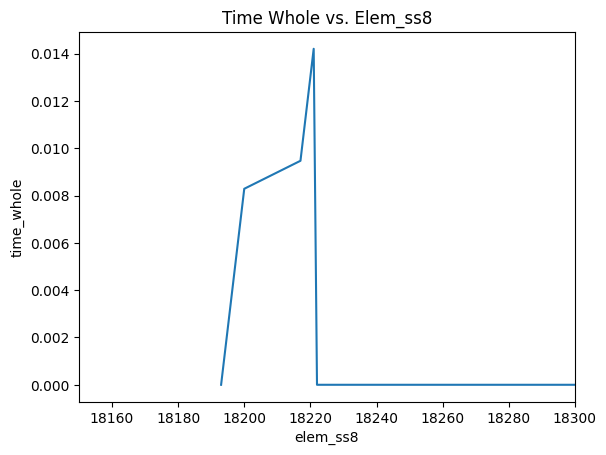

In [60]:
import matplotlib.pyplot as plt

# Assuming 'time_whole' and 'elem_ss8' are columns in your DataFrame
plt.plot(df['elem_ss8'], df['time_whole'])
plt.xlabel('elem_ss8')
plt.xlim(18150, 18300)
plt.ylabel('time_whole')
plt.title('Time Whole vs. Elem_ss8')
plt.show()

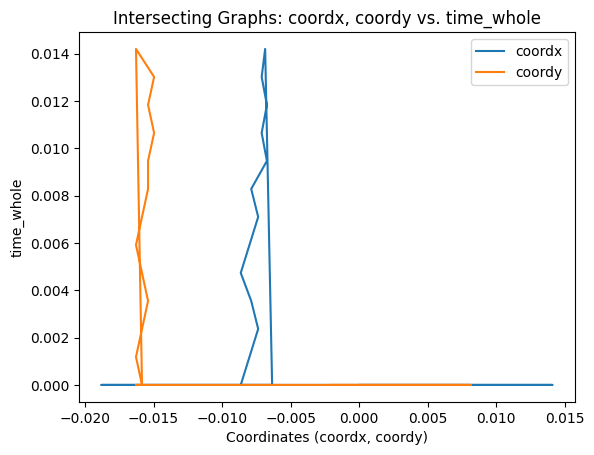

In [61]:
import matplotlib.pyplot as plt

# Plot the first line (coordx vs. time_whole)
plt.plot(df['coordx'], df['time_whole'], label='coordx')

# Plot the second line (coordy vs. time_whole)
plt.plot(df['coordy'], df['time_whole'], label='coordy')

# Set labels and title
plt.xlabel('Coordinates (coordx, coordy)')
plt.ylabel('time_whole')
plt.title('Intersecting Graphs: coordx, coordy vs. time_whole')

# Add a legend to distinguish the lines
plt.legend()

# Display the plot
plt.show()

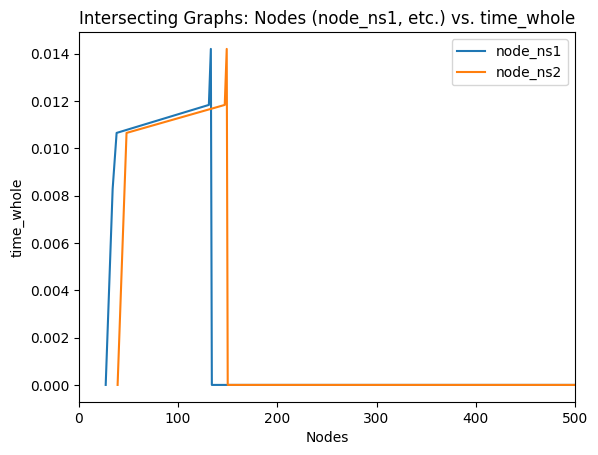

In [69]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns named 'node_ns1', 'node_ns2', etc.
node_columns = ['node_ns1', 'node_ns2']  # Add more node columns as needed

# Plot the 'time_whole' values for each node column
for node_column in node_columns:
    plt.plot(df[node_column], df['time_whole'], label=node_column)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('time_whole')
plt.title('Intersecting Graphs: Nodes (node_ns1, etc.) vs. time_whole')
plt.xlim(0, 500)

# Add a legend to distinguish the lines
plt.legend()

# Display the plot
plt.show()

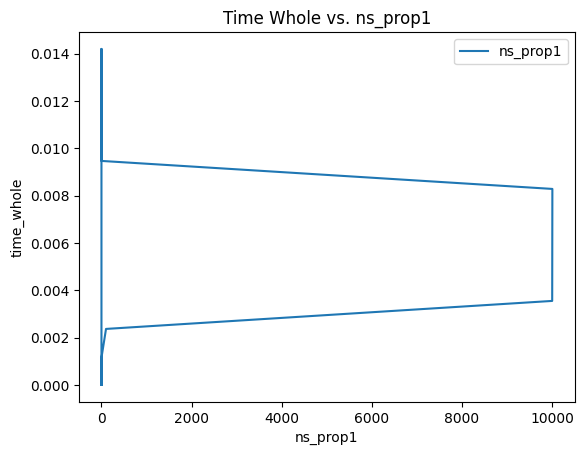

In [84]:
import matplotlib.pyplot as plt

# Assuming 'time_whole' and 'ns_prop1s4' are columns in your DataFrame
plt.plot(df['ns_prop1'], df['time_whole'], label='ns_prop1')

# Add labels and title
plt.xlabel('ns_prop1')
plt.ylabel('time_whole')
plt.title('Time Whole vs. ns_prop1')

# Add a legend
plt.legend()

# Display the plot
plt.show()

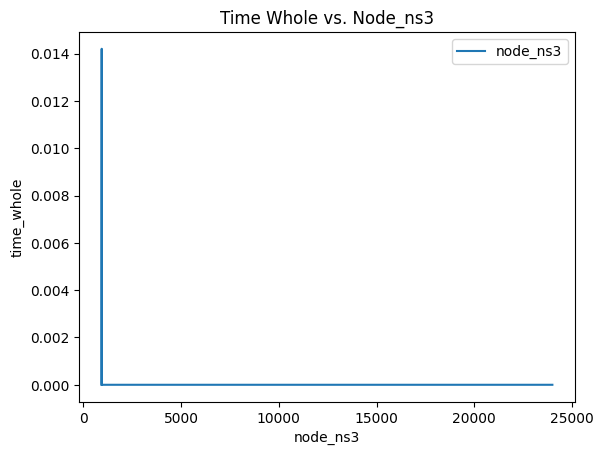

In [76]:
import matplotlib.pyplot as plt

# Assuming 'time_whole' and 'node_ns3' are columns in your DataFrame
plt.plot(df['node_ns3'], df['time_whole'], label='node_ns3')

# Add labels and title
plt.xlabel('node_ns3')
plt.ylabel('time_whole')
plt.title('Time Whole vs. Node_ns3')

# Add a legend
plt.legend()

# Display the plot
plt.show()

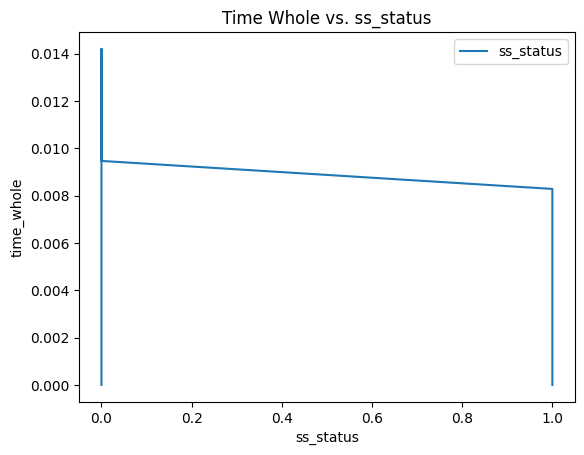

In [86]:
import matplotlib.pyplot as plt

# Assuming 'time_whole' and 'ss_status' are columns in your DataFrame
plt.plot(df['ss_status'], df['time_whole'], label='ss_status')

# Add labels and title
plt.xlabel('ss_status')
plt.ylabel('time_whole')
plt.title('Time Whole vs. ss_status')

# Add a legend
plt.legend()

# Display the plot
plt.show()

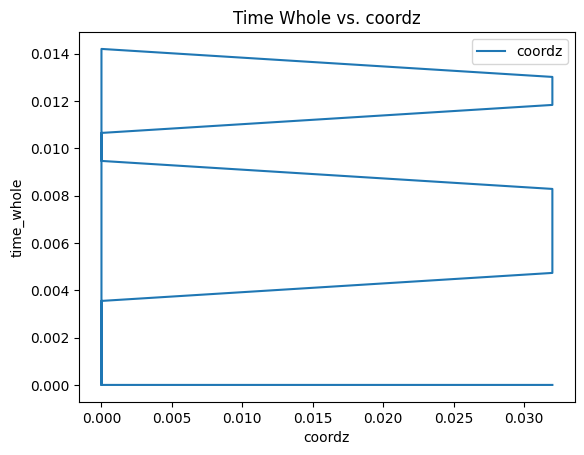

In [89]:
import matplotlib.pyplot as plt

# Assuming 'time_whole' and 'coordz' are columns in your DataFrame
plt.plot(df['coordz'], df['time_whole'], label='coordz')

# Add labels and title
plt.xlabel('coordz')
plt.ylabel('time_whole')
plt.title('Time Whole vs. coordz')

# Add a legend
plt.legend()

# Display the plot
plt.show()